In [1]:
#import numpy, scipy, math and astropy libraries
import numpy as np
import scipy as sp
import math
import astropy

#import packages that stephanie's fit_rossby.py scripts rely on
import emcee
import corner

#load functions originally written by Stephanie Douglas for her 2014 paper, 
#(see the repo at https://github.com/stephtdouglas/fit-rossby)
#and subsequently modified by KRC in 2019, as stored in fit_rossby.py in my fork
%run ../scripts/fit_rossby_log.py
#from fit_rossby import quantile, rossby_model, lnprob, run_rossby_fit, plot_rossby, print_pdf

In [2]:
#import graphics packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.colorbar as cb

#set plotting defaults to values that make plots look publication ready
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.fontsize'] = 11
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

#ensure that plots show up in our notebook (comment this out if converting to a script)
%matplotlib notebook

<IPython.core.display.Javascript object>


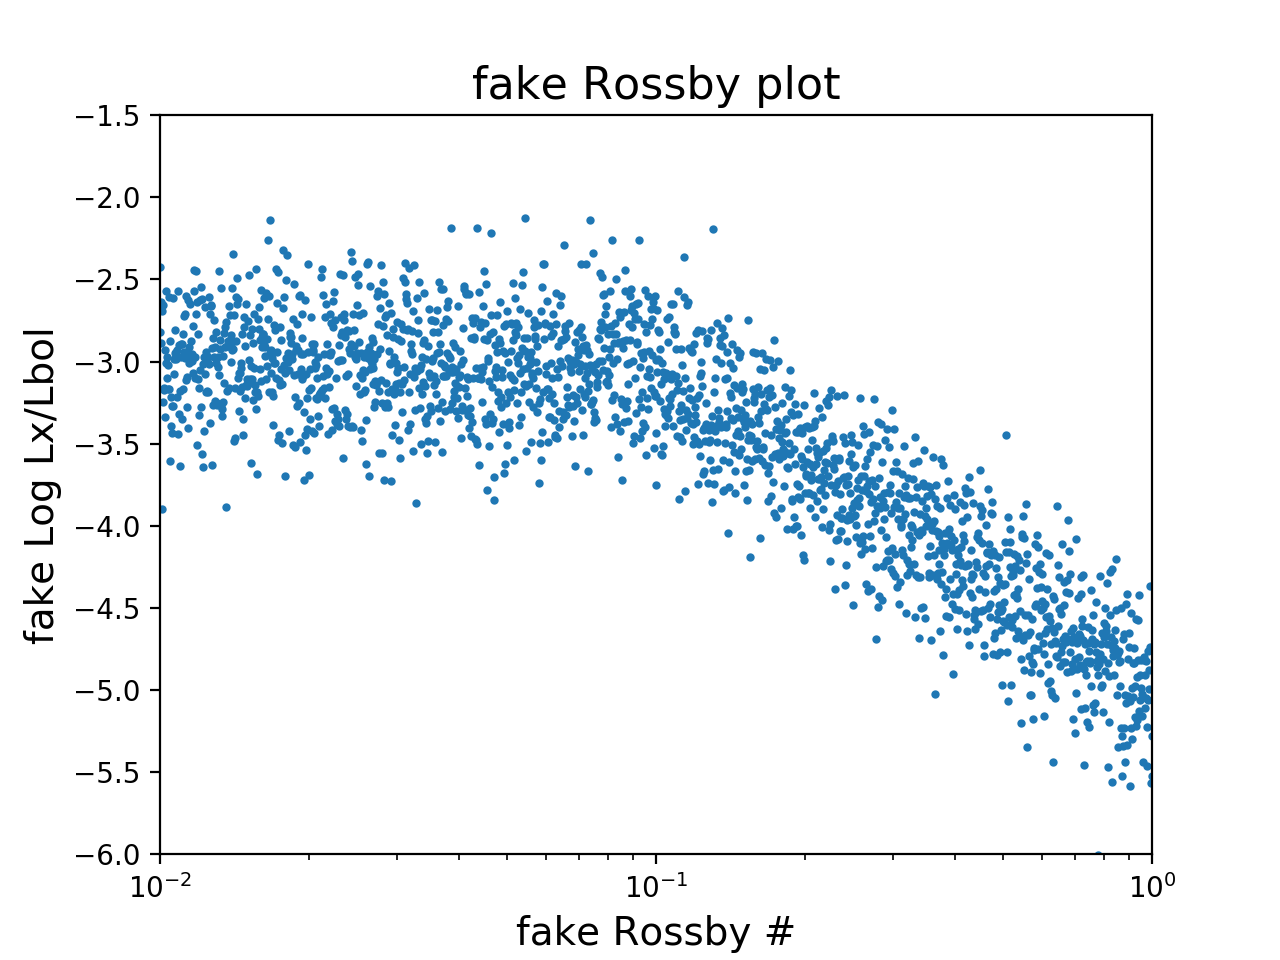

In [4]:
#create a fake Lx vs. rossby dataset to fit to

#start with the saturated region
satLx, sigma = -3, 0.3 # mean and standard deviation
LogLx_sat = np.random.normal(satLx, sigma, 1000)
#Lx_sat = 10.**(np.random.normal(satLx, sigma, 1000))
fake_rossby_sat = np.logspace(-2, -1, 1000)
#errors = np.ones 

#now after the knee
fake_rossby_slope = np.logspace(-1, 0, 1000)
LogLx_slope = np.linspace(-3, -5, 1000) + np.random.normal(0, sigma, 1000)
#Lx_slope = 10.**(np.linspace(-3, -5, 1000) + np.random.normal(0, sigma, 1000))

#print(Lx_slope)

#now force them into a common array
fake_LogLx_Lbol = np.concatenate((LogLx_sat, LogLx_slope), axis=None)
#fake_Lx_Lbol = np.concatenate((Lx_sat, Lx_slope), axis=None)
fake_rossby = np.concatenate( (fake_rossby_sat, fake_rossby_slope), axis=None)

#plt.clf()

#plot the fake data
plt.scatter(fake_rossby, fake_LogLx_Lbol, marker = '.')
plt.title('fake Rossby plot' )
plt.xscale('log')
#plt.yscale('log')
xlabel = plt.xlabel('fake Rossby #') 
ylabel = plt.ylabel('fake Log Lx/Lbol')
plt.axis([10**(-2),1.,-6,-1.5])

plt.savefig('fake_rossby.jpg', bbox_inches='tight') 

/Users/coveyk/anaconda/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/coveyk/anaconda/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


sat_level=-3.0111423 +0.0086528/-0.0085682
turnover=0.098 +0.002/-0.003
beta=-1.945 +0.037/-0.036
var=-2.483 +0.018/-0.018


<IPython.core.display.Javascript object>


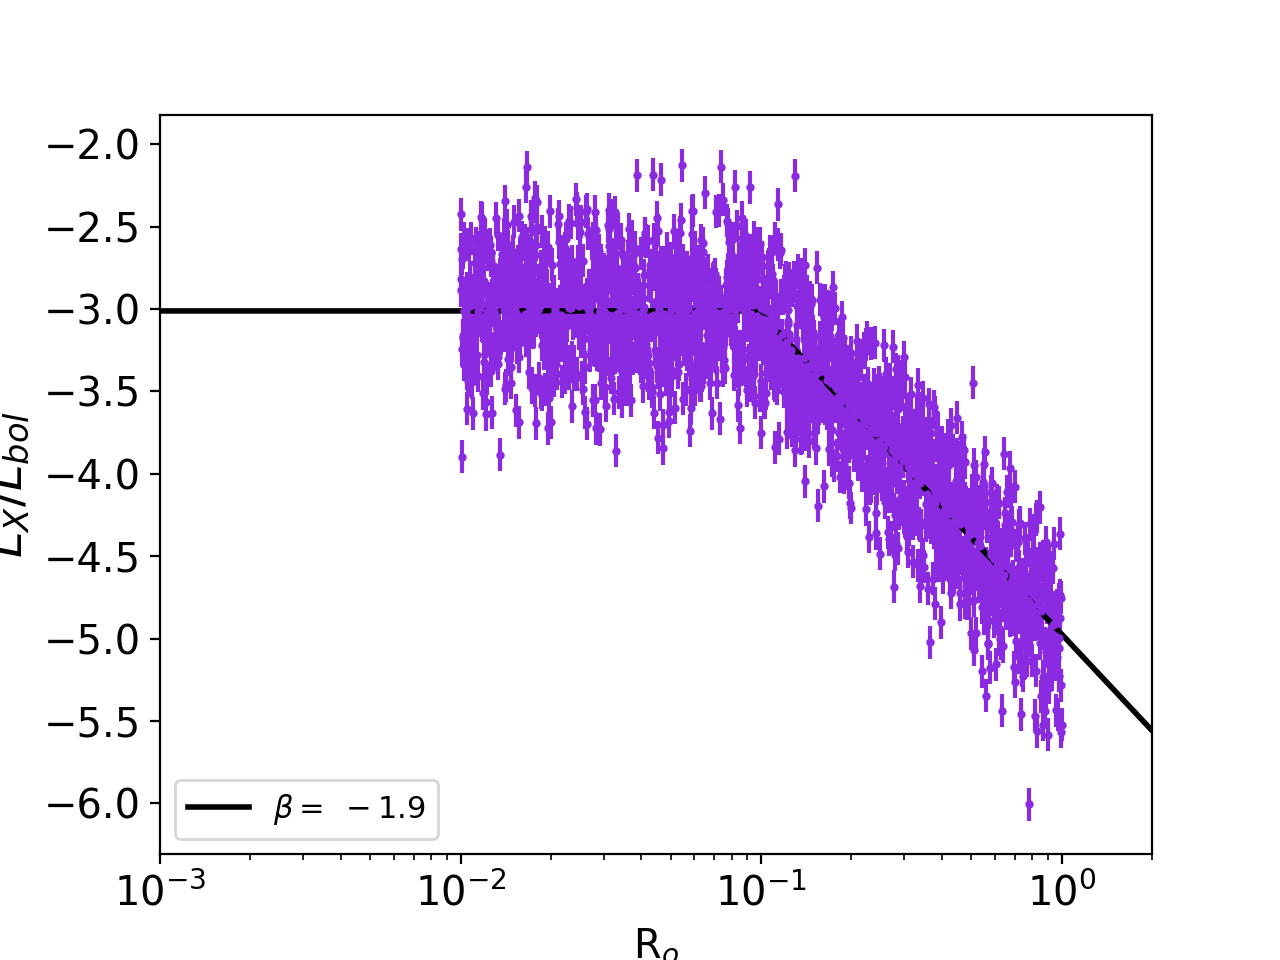

In [6]:
#### now try to fit using Stephanie's routine's
# Decide on your starting parameters
start_p = np.asarray([-3.5, 0.25, -1.0, 0.1])

# run the emcee wrapper function
samples = run_rossby_fit(start_p, fake_rossby, fake_LogLx_Lbol, np.ones(len(fake_rossby))*0.1)

# Plot the output
plot_rossby_log(samples, fake_rossby, fake_LogLx_Lbol, np.ones(len(fake_rossby))*0.1, plotfilename = 'fake_rossby_fit.jpg')

<IPython.core.display.Javascript object>


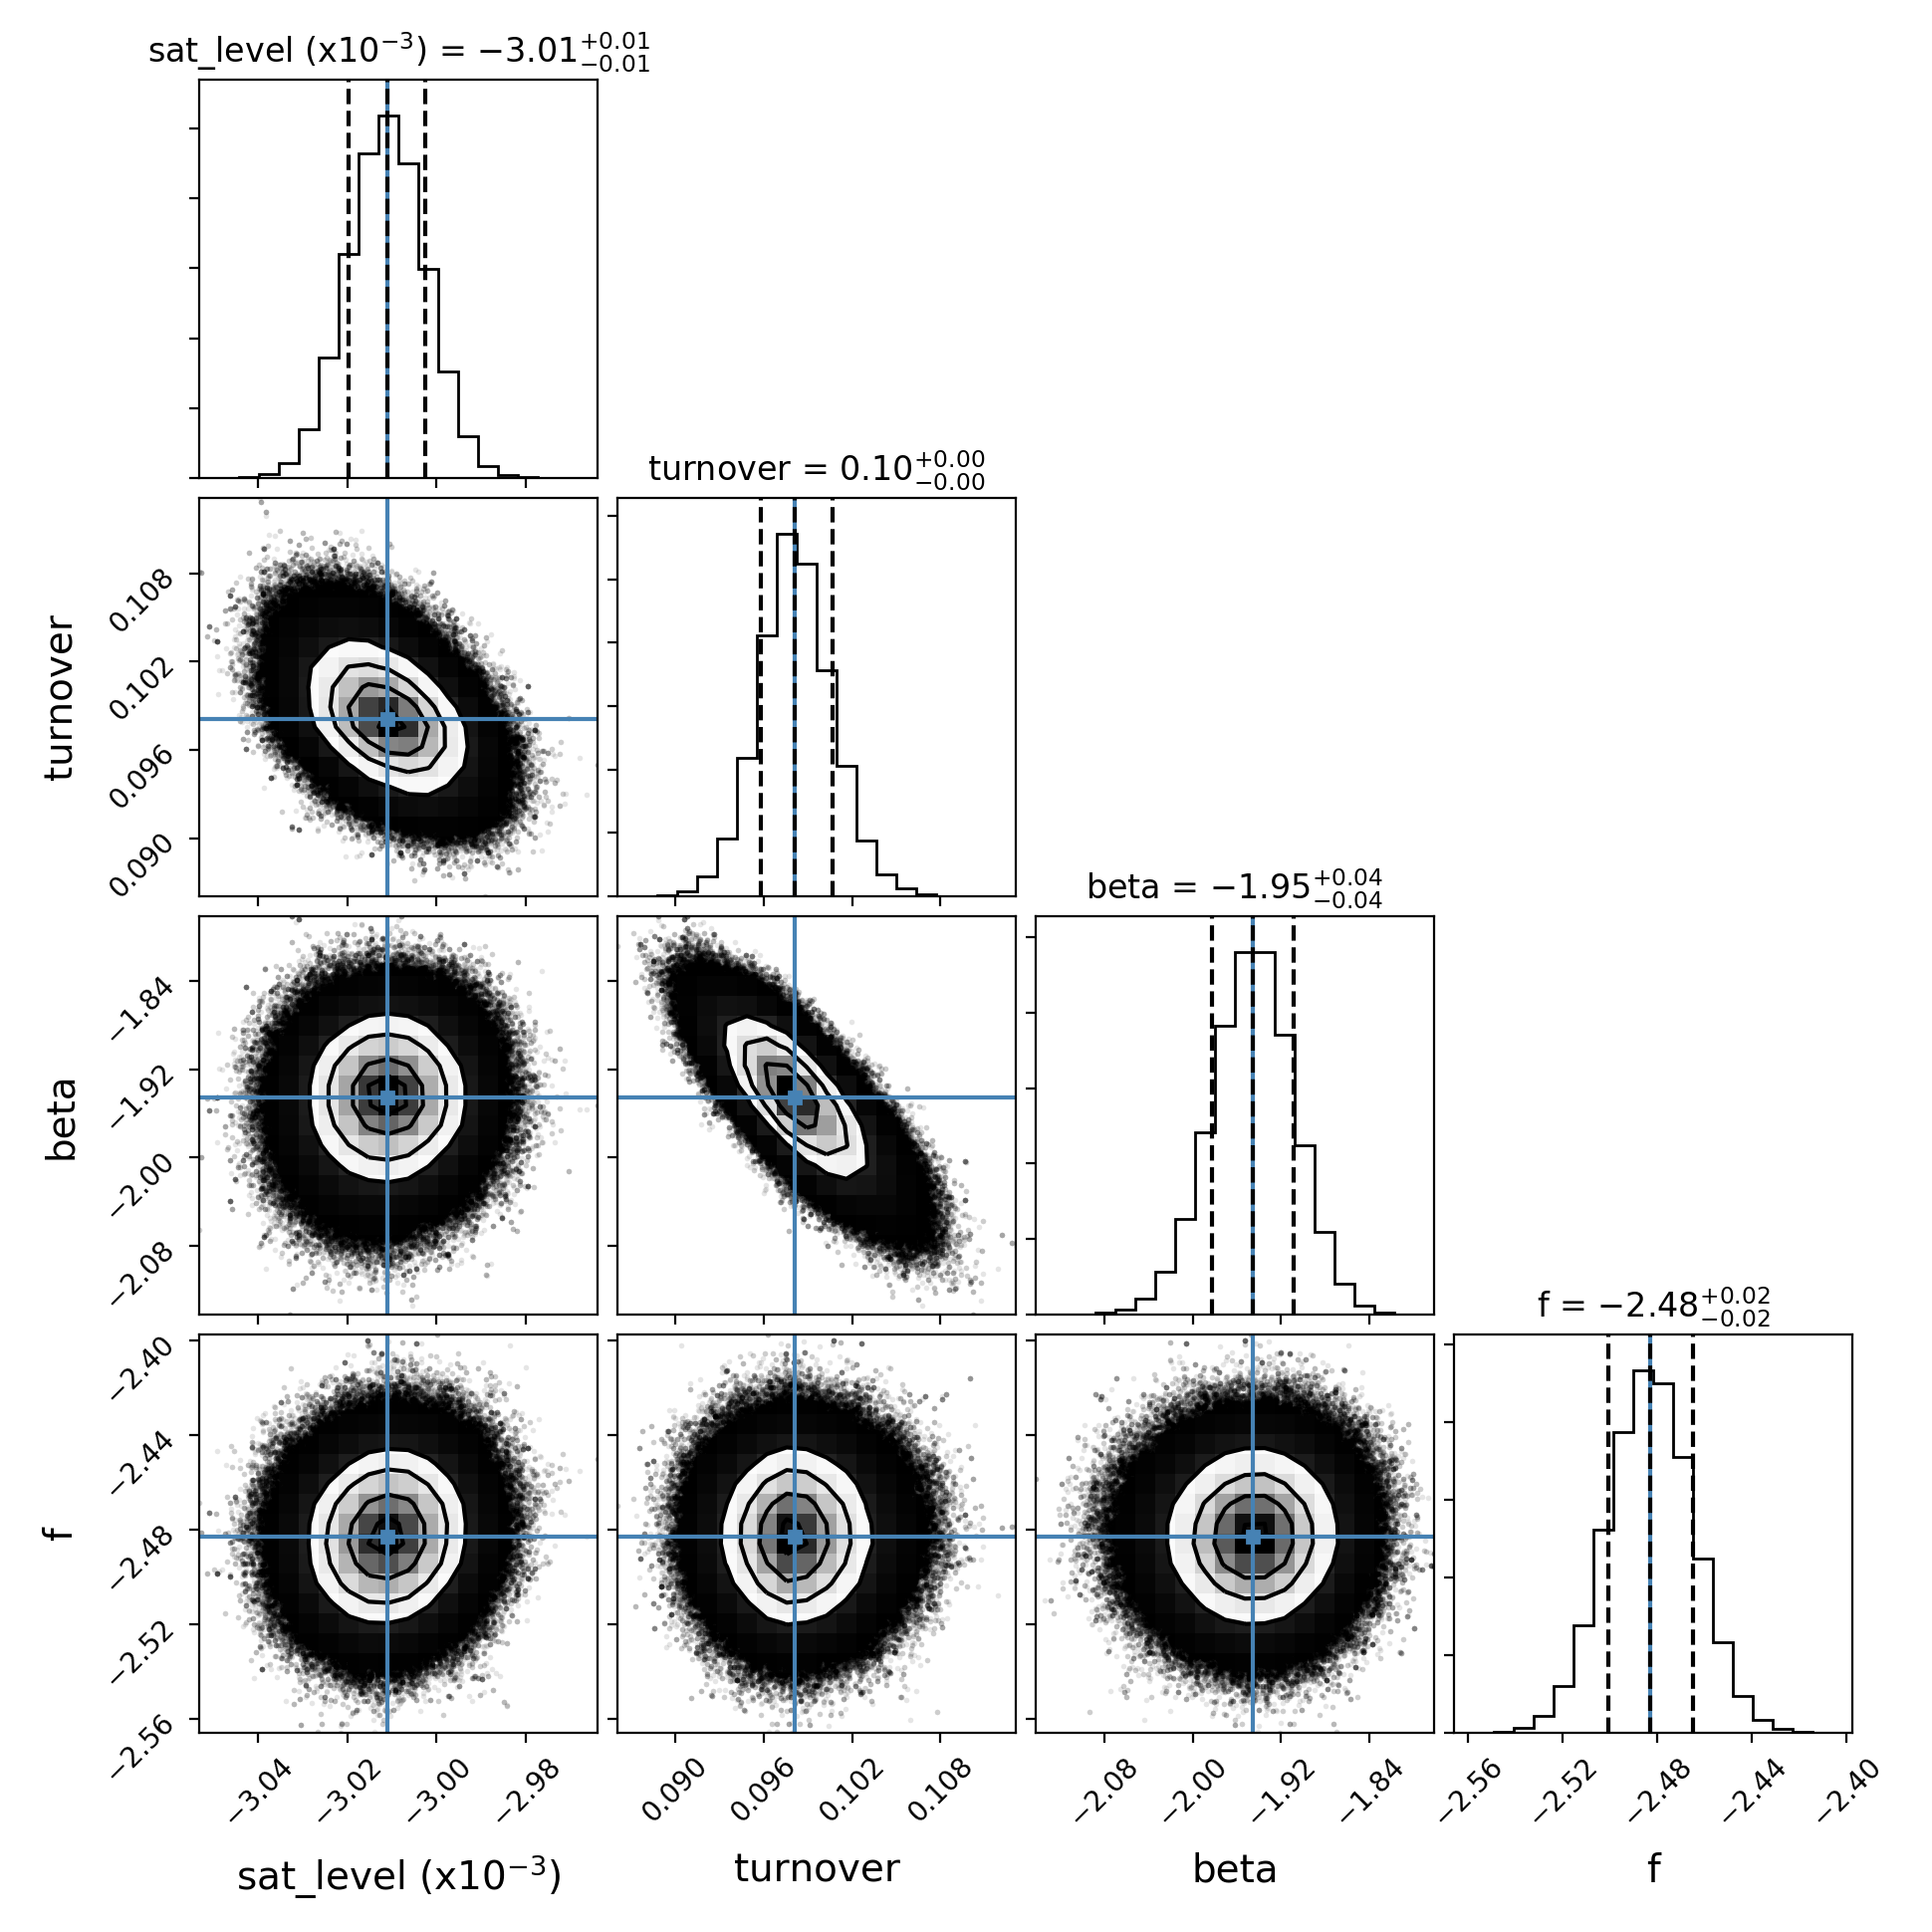

In [7]:
# Make a triangle plot 

# Set up the parameters of the problem.
ndim, nsamples = 4, len(samples) 

sl_mcmc = quantile(samples[:,0],[.16,.5,.84])
to_mcmc = quantile(samples[:,1],[.16,.5,.84])
be_mcmc = quantile(samples[:,2],[.16,.5,.84])
var_mcmc = quantile(samples[:,3],[.16,.5,.84])


bestFit = [sl_mcmc[1][1], to_mcmc[1][1], be_mcmc[1][1], var_mcmc[1][1]]

# Plot it.
figure = corner.corner(samples, labels=['sat_level (x10$^{-3}$)','turnover','beta', 'f'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, truths = bestFit)


# Uncomment to save the plot
plt.savefig('fake_rossby_corner.png')